# Midterm Exam
- **Author:** Deana Baron
- **Date:** 4/5/19
***
## Introduction 
For the midterm you will use the fluxnet hourly/daily/monthly/annual data  to find what variables influence the net ecosystem exchanges. These factors include both environmental factors such as air temperation, humidity, and precipitation and biophysical parameters such as land surface type, LAI and light use efficiency and other parameters. I attached two papers on this topic. We will search for answers for the three questions listed in the Baldocchi's paper 

1. how variable are carbon fluxes on a year to year basis? 
2. what are the biophysical factors that may cause interannual variability and/or temporal trends in carbon fluxes?;
3. how does the biophysical control on this carbon flux variability differ by climate and ecological spaces?

You will use both annual and monthly/daily flux data.  All the detail can be found at  https://fluxnet.fluxdata.org/data/fluxnet2015-dataset/). Here is the list of variables of each file - https://fluxnet.fluxdata.org/data/fluxnet2015-dataset/subset-data-product/ and here is the list of sites - https://fluxnet.fluxdata.org/sites/site-list-and-pages/. I downloaded 8 sites of fluxe data. These sites range from US, Canada, Europe and Australia.You are only required to choose two sites for the analysis. Of course. Here are the details of each site:

`http://sites.fluxdata.org/US-Ha1/
http://sites.fluxdata.org/US-MMS/
http://sites.fluxdata.org/US-Ton/
http://sites.fluxdata.org/FI-Hyy/
http://sites.fluxdata.org/AU-Tum/
http://sites.fluxdata.org/CA-Obs/
http://sites.fluxdata.org/US-Var/
http://sites.fluxdata.org/GF-Guy/`

The data are stored at 'http://www.geography.hunter.cuny.edu/~wenge/GTECH385-785/Data4Midterm.zip' as zip file. You can download the zip file and unzip it mannualy on your local drive. You can also use Python to access the zip file and pandas directly read the zip 
file into pandas dataframes.

## Part I - Annual Data Analysis  (65pts) 

1. Import packages, set working directory, download the data and read the annaul data into 
pandas dataframes (10pts). 

In [2]:
# import necessary libraries
import os
import urllib.request
from glob import glob
import zipfile
from fnmatch import fnmatch
import pandas as pd
import matplotlib.pyplot as plt

# print statement to show success
print("Libraries successfully imported!")

# set the current working directory
os.chdir('C:\\Users\\dbaron\\Documents')

# check the current working directory after setting it
os.getcwd()

Libraries successfully imported!


'C:\\Users\\dbaron\\Documents'

In [3]:
# download the data
urllib.request.urlretrieve(
    url = "http://www.geography.hunter.cuny.edu/~wenge/GTECH385-785/Data4Midterm.zip",                  
    filename = "Data4Midterm/Data4Midterm.zip"
)

# unzip the content into a subdirectory
zip_ref = zipfile.ZipFile("Data4Midterm/Data4Midterm.zip", 'r')
zip_ref.extractall()
zip_ref.close()

print("Data successfully downloaded and extracted!")

Data successfully downloaded and extracted!


2. To read the flux data into Pandas dataframes (10pts) - 
   you only need to read the following columns

   flux = pd.read_csv(mysite,parse_dates=['TIMESTAMP'],na_values=['-9999'],
                   usecols=['TIMESTAMP','TA_F','P_F','SW_IN_F','VPD_F','NEE_VUT_REF',
                           'RECO_NT_VUT_REF','GPP_NT_VUT_REF'])
                                
   More on Pandas - https://www.shanelynn.ie/using-pandas-dataframe-creating-editing-viewing-data-in-python/                   

In [4]:
# change the current working directory to the subfolder
os.chdir('C:\\Users\\dbaron\\Documents\\Data4Midterm')

# get list of yearly files
filelist = glob("*_YY_*")
print(filelist)

['FLX_AU-Tum_FLUXNET2015_SUBSET_YY_2001-2014_2-3.csv', 'FLX_CA-Obs_FLUXNET2015_SUBSET_YY_1997-2010_1-3.csv', 'FLX_FI-Hyy_FLUXNET2015_SUBSET_YY_1996-2014_1-3.csv', 'FLX_US-Ha1_FLUXNET2015_SUBSET_YY_1991-2012_1-3.csv', 'FLX_US-MMS_FLUXNET2015_SUBSET_YY_1999-2014_1-3.csv', 'FLX_US-Ton_FLUXNET2015_SUBSET_YY_2001-2014_1-3.csv']


In [5]:
# extract all the site names
sites = []
for file in filelist:
    name = file[4:10]
    sites.append(name)
print(sites)

['AU-Tum', 'CA-Obs', 'FI-Hyy', 'US-Ha1', 'US-MMS', 'US-Ton']


In [6]:
# read all yearly data into dataframes

data = []
for file in filelist:
    flux = pd.read_csv(file,parse_dates=['TIMESTAMP'],na_values=['-9999'],
                       usecols=['TIMESTAMP','TA_F','P_F','SW_IN_F','VPD_F','NEE_VUT_REF',
                                'RECO_NT_VUT_REF','GPP_NT_VUT_REF'])
    data.append(flux)
print(data)

[    TIMESTAMP    TA_F  SW_IN_F  VPD_F       P_F  NEE_VUT_REF  RECO_NT_VUT_REF  \
0  2001-01-01   7.526  188.921  3.371   970.279     -544.618          3354.49   
1  2002-01-01   9.233  199.572  4.415   976.570     -642.753          2417.31   
2  2003-01-01   8.168  192.036  4.425  1073.276     -923.629          2134.16   
3  2004-01-01   9.330  194.811  4.849  1002.783     -536.037          2328.74   
4  2005-01-01   9.529  193.172  4.462  1009.373     -359.137          2687.91   
5  2006-01-01  10.063  212.697  5.836   425.314     -638.720          2608.11   
6  2007-01-01  10.615  194.992  5.223  1014.200     -410.261          2728.20   
7  2008-01-01   9.280  196.975  4.503   616.219     -717.406          2607.78   
8  2009-01-01  10.171  198.901  5.438   514.743     -581.556          2754.87   
9  2010-01-01   9.487  187.080  3.710  1483.926     -629.457          2588.26   
10 2011-01-01   9.775  183.012  3.504  1311.247     -658.499          2706.36   
11 2012-01-01   9.063  192.

3. Plot the time series of environmental factors (10pts)- air temperature (Ta_F), precipitation (P_F in mm/d for monthly and daily data and mm/y for annual data), vapor pressure deficity (VPD_F in hPa) and imcoming solar radiation (SW_IN_F in W m-2) (10pts)

In [7]:
# create function to plot all dataframes of environmental factors
def plotenvfactors(x):
    """
    function takes a list of pandas dataframes
    function does not take any other kind of variable or type
    output are plots of environmental factors in each dataframe
    """
    for df in x:
        # load the air temp on ax1
        ax1.set(xlabel="Year", ylabel="Air Temperature (degrees Celsius)");
        ax1.plot(df["TIMESTAMP"], df["TA_F"])

        # load the precipitation on ax2
        ax2.set(xlabel="Year", ylabel="Precipitation (mm/y)");
        ax2.plot(df["TIMESTAMP"], df["P_F"])
    
        # load the vapor pressure deficiency on ax3
        ax3.set(xlabel="Year", ylabel="Vapor Pressure Deficiency (hPa)");
        ax3.plot(df["TIMESTAMP"], df["VPD_F"])
        
        # load the incoming solar radiation on ax4
        ax4.set(xlabel="Year", ylabel="Solar Radiation (W m-2)");
        ax4.plot(df["TIMESTAMP"], df["SW_IN_F"])

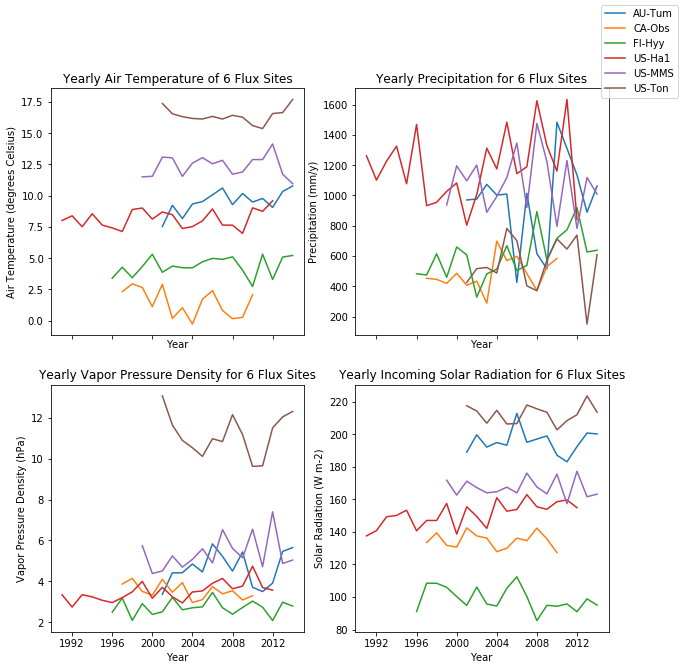

In [8]:
# set parameters for the figure for the overplotting
plt.rcParams["figure.figsize"] = (10, 10)

fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2, 2, sharex=True)
ax1.set(title="Yearly Air Temperature of 6 Flux Sites");
ax2.set(title="Yearly Precipitation for 6 Flux Sites");
ax3.set(title="Yearly Vapor Pressure Deficiency for 6 Flux Sites");
ax4.set(title="Yearly Incoming Solar Radiation for 6 Flux Sites");

# run function on data list
plotenvfactors(data)

# set the legend for the figure
fig.legend((sites));

4. plot the time series of ecosyten variables (10pts)- net ecosystem exchange (NEE_VUT_REF), 
     respiration (RECO_NT_VUT_REF) and gross primariy production (GPP_NT_VUT_REF). 
     The unit for all three is  gC m-2 d-1 for monthly and daily data, gC m-2 y-1 for annual data


In [9]:
# modify the plotenvfactors() function to work for the NEE, RECO, and GPP
def plotecofactors(x):
    """
    function takes a list of pandas dataframes
    function does not take any other kind of variable or type
    output are plots of ecosystem factors in each dataframe
    """
    for df in x:
        # load the NEE on ax1
        ax1.set(xlabel="Year", ylabel="Net Ecosystem Exchange (gC m-2 d-1)");
        ax1.plot(df["TIMESTAMP"], df["NEE_VUT_REF"])

        # load the RECO on ax2
        ax2.set(xlabel="Year", ylabel="Respiration (gC m-2 d-1)");
        ax2.plot(df["TIMESTAMP"], df["RECO_NT_VUT_REF"])
    
        # load the GPP on ax3
        ax3.set(xlabel="Year", ylabel="Gross Primary Production (gC m-2 d-1)");
        ax3.plot(df["TIMESTAMP"], df["GPP_NT_VUT_REF"])

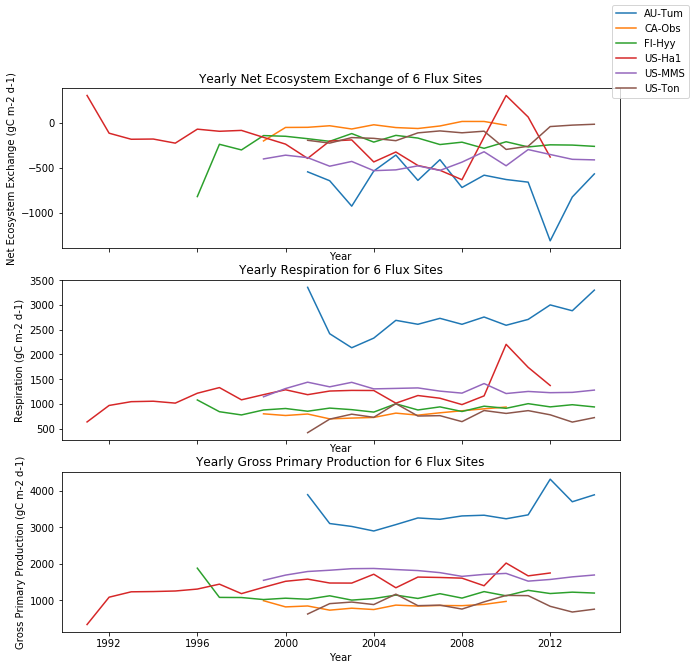

In [12]:
# set parameters for the figure for the overplotting
plt.rcParams["figure.figsize"] = (10, 10)

fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
ax1.set(title="Yearly Net Ecosystem Exchange of 6 Flux Sites");
ax2.set(title="Yearly Respiration for 6 Flux Sites");
ax3.set(title="Yearly Gross Primary Production for 6 Flux Sites");

# run function on data list
plotecofactors(data)

# set the legend for the figure
fig.legend((sites));

5. plot the scatter plot between Gross primariy production with environmental factors - air temperature, precipitation, vapor pressure deficity and imcoming solar radiation (10pts)

More on Matplotlib - https://matplotlib.org/tutorials/index.html
https://realpython.com/python-matplotlib-guide/?utm_campaign=Data%2BElixir&utm_medium=email&utm_source=Data_Elixir_172

In [22]:
# write a function for the scatter plot
def fluxscatter(x):
    """
    function takes a list of pandas dataframes
    function does not take any other kind of variable or type
    output are scatter plots of GPP vs env factors
    """
    for df in x:
        # GPP vs air temp
        ax1.set(xlabel="Air Temperature (degrees Celsius)", ylabel="Gross Primary Production (gC m-2 d-1)")
        ax1.scatter(df["TA_F"], df["GPP_NT_VUT_REF"])
        
        # GPP vs precipitation
        ax2.set(xlabel="Precipitation (mm/y)", ylabel="Gross Primary Production (gC m-2 d-1)")
        ax2.scatter(df["P_F"], df["GPP_NT_VUT_REF"])
        
        # GPP vs vapor pressure deficiency
        ax3.set(xlabel="Vapor Pressure Deficiency (hPa)", ylabel="Gross Primary Production (gC m-2 d-1)")
        ax3.scatter(df["VPD_F"], df["GPP_NT_VUT_REF"])
        
        # GPP vs incoming solar radiation
        ax4.set(xlabel="Solar Radiation (W m-2)", ylabel="Gross Primary Production (gC m-2 d-1)")
        ax4.scatter(df["SW_IN_F"], df["GPP_NT_VUT_REF"])

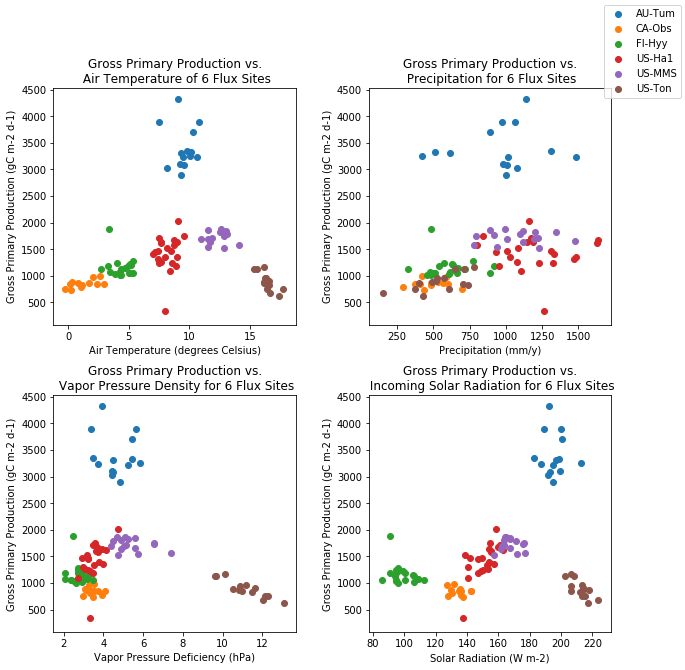

In [27]:
# set parameters for the figure for the overplotting
plt.rcParams["figure.figsize"] = (10, 10)

fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.3, hspace=0.3)
ax1.set(title="Gross Primary Production vs.\n Air Temperature of 6 Flux Sites");
ax2.set(title="Gross Primary Production vs.\n Precipitation for 6 Flux Sites");
ax3.set(title="Gross Primary Production vs.\n Vapor Pressure Density for 6 Flux Sites");
ax4.set(title="Gross Primary Production vs.\n Incoming Solar Radiation for 6 Flux Sites");

# run function on data list
fluxscatter(data)

# set the legend for the figure
fig.legend((sites));

- Question 1 (5pts) - Are there any trend and variability of the environmental factors? Do you observe any difference between different sites? 

- Question 2 (5pts)- Are there any trend and variability of the ecosytem variables? Do you observe any  (10pts)  between different sites? 

- Question 3 (5pts)- Are the GPP associated with any of the environmental factors?
***
1. On the yearly scale, all six sites definitely have variability since all of the sites are made up of different types of vegetation. The overall yearly trend for the four environmental factors is similar for every site, and is slightly erratic. Many it's hard to denote any pertinent trends at this level, as much of the variability is due to the differences in site location and vegetation type.

2. The ecosystem variables appear to have the same variability between sites as they would for the environmental factors. It's hard to denote any trends across the years as they all appear to be pretty similar year to year. Variability here is definitely contributed to the difference in vegetation type and site locations.

3. These plots are a little more telling. There is definitely a relationship between GPP and the different environmental factors. Air temperature, solar radiation, and vapor pressure density show the obvious trends that there is a certain peak value for each environmental variable that results in a larger GPP, but outside this range the GPP will begin to drop. Therefore, sites with higher latitudes tend to have higher GPP than those in more tropical areas with higher air temperature, vapor pressure deficiency, and solar radiation. Precipitation is harder to denote a trend for, and the Australian site is an outlier due to the stark differences in location from the other sites.